In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ratings/desafio_ratings.csv
/kaggle/input/details/desafio_details.csv





## Importando as bibliotecas que serão utilizadas

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from geopy.geocoders import Nominatim

## Lendo e filtrando os arquivos csv

In [30]:
details = pd.read_csv("/kaggle/input/details/desafio_details.csv", encoding='latin-1', sep=';')
ratings = pd.read_csv("/kaggle/input/ratings/desafio_ratings.csv", encoding='latin-1', sep=';')


In [31]:
# Remove features desnecessárias para análise
details_filtrado = details.drop(columns=['Unnamed: 0'])
ratings_filtrado = ratings.drop(columns=['Unnamed: 0'])
ratings_filtrado1 = ratings_filtrado.dropna(subset=['Total'])


In [32]:
imoveis = pd.merge(details_filtrado, ratings_filtrado, on='hotel_id')   #Juntando os dois arquivos csv

## Ordernando as cidades de forma crescente pelo número de listings

In [33]:
listings = imoveis['city_name'].value_counts().reset_index()      #Conta o número de listings de cada cidade nos Dados
listings.columns = ['city_name', 'listings']                      #Tabela com a cidade e o numero de listings
listings = listings.sort_values(by='listings', ascending=True)   #Deixando em ordem crescente

listings


,city_name,listings
38,São José,1
29,Caldas Novas,1
30,Camboriú,1
31,Bertioga,1
32,Meia Praia,1
37,Taguatinga,1
34,Águas Brancas,1
35,Praia do Rosa,1
36,Maceió,1
33,Pirenópolis,1


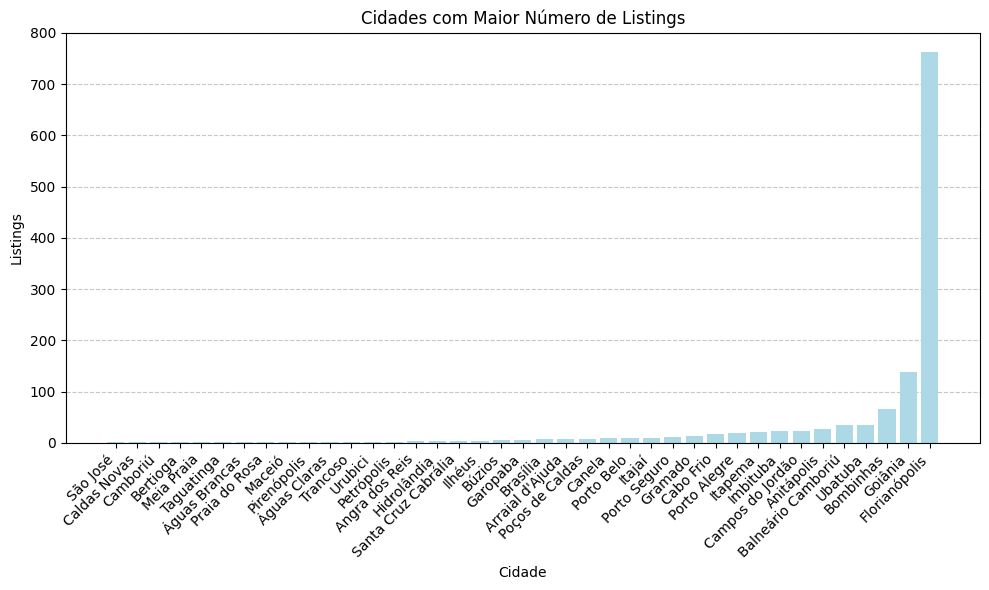

In [34]:
#Grafico crescente das cidades com maior numero de listings

plt.figure(figsize = (10,6))
plt.grid(axis='y', linestyle='--', alpha=0.7,  zorder=1)
plt.title('Cidades com Maior Número de Listings')
plt.bar(listings['city_name'], listings['listings'], color='lightblue',  zorder=2)
plt.xlabel('Cidade')
plt.ylabel('Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Ordene as cidades em ordem decrescente de metros quadrados

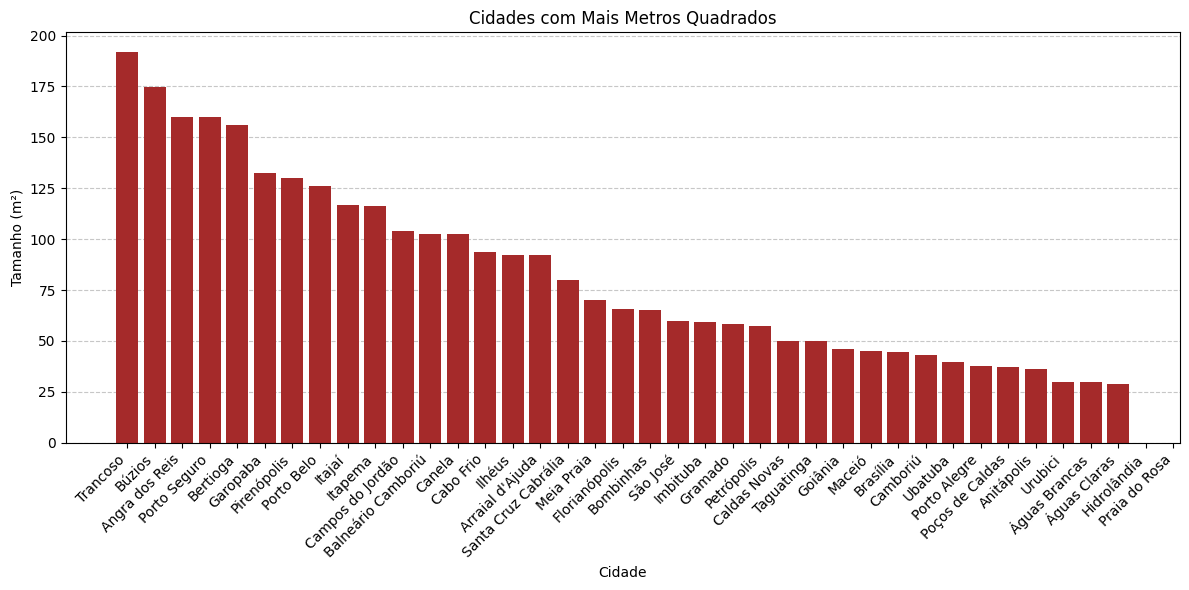

In [35]:
tamanho = imoveis[['city_name', 'room_surface_in_m2']]
tamanho = imoveis[['city_name', 'room_surface_in_m2']].groupby('city_name').mean().reset_index()
tamanho = tamanho.sort_values(by='room_surface_in_m2', ascending=False) 

plt.figure(figsize = (12,6))
plt.bar(tamanho['city_name'], tamanho['room_surface_in_m2'], color='brown',  zorder=2)
plt.title('Cidades com Mais Metros Quadrados')
plt.xlabel('Cidade')
plt.ylabel('Tamanho (m²)')

plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [36]:
#Quais cidades têm mais avaliações?

Numero_avaliacoes= imoveis.groupby('city_name')['number_of_ratings'].sum().reset_index()       #Somando todos as avaliações de cada cidade
Numero_avaliacoes = Numero_avaliacoes.sort_values(by='number_of_ratings', ascending=False)     #Ordem crescente 

Numero_avaliacoes.head(10)                                                              #Printando o top10 com mais avaliaçoes

,city_name,number_of_ratings
13,Florianópolis,87353
1,Anitápolis,2106
11,Campos do Jordão,1815
5,Bombinhas,1126
15,Goiânia,531
3,Balneário Camboriú,54
20,Itajaí,23
21,Itapema,19
16,Gramado,15
35,Ubatuba,15


In [37]:
#Quais cidades têm a maior média de avaliações? E a menor média?

def juntando(linha):
    if pd.notna(linha['number_of_ratings']):                        #Para cada linha da coluna number_of_ratings será verdadeiro caso NÂO for NaN
        linha['Total'] = linha['Total']* linha['number_of_ratings'] #Multiplicando a nota total pelo numero de avaliaçoes
    else:
        linha['Total'] = linha['Total']                             #Caso for FALSO não vai multiplicar nada
    
    return linha                                           
 
avaliacoes = imoveis.apply(juntando, axis=1)                                                                  # Aplicando a função juntando no arquivo
avaliacoes = avaliacoes[['city_name', 'number_of_ratings', 'Total']]
avaliacoes = avaliacoes.groupby('city_name').agg({'Total': 'sum', 'number_of_ratings': 'sum'}).reset_index()  #Somando todas as notas da cidade
avaliacoes['Nota_media'] = avaliacoes['Total']/avaliacoes['number_of_ratings']
avaliacoes['Nota_media'] = avaliacoes['Nota_media'].apply(lambda x: round(x, 2))                              #Deixando com duas casa decimais
avaliacoes = avaliacoes.sort_values(by='Nota_media', ascending=False)

avaliacoes[['city_name','Nota_media']].head(10)

,city_name,Nota_media
0,Angra dos Reis,10.00
6,Brasília,10.00
18,Ilhéus,10.00
27,Porto Belo,9.75
24,Petrópolis,9.62
32,São José,9.50
8,Cabo Frio,9.50
35,Ubatuba,9.47
1,Anitápolis,9.40
14,Garopaba,9.33


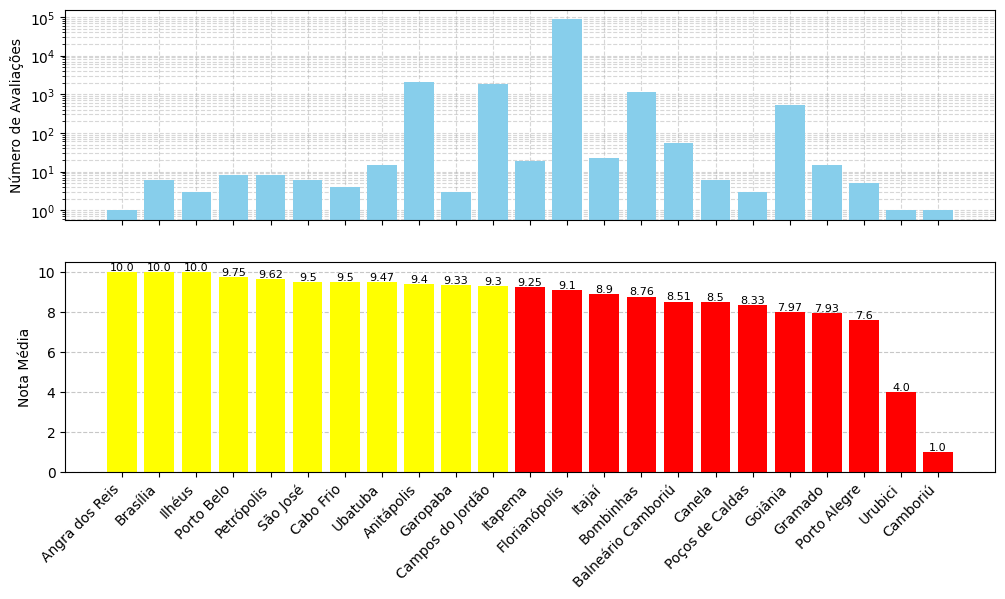

In [38]:
#Plotando o gráfico de numero de avaliações com Nota media

avaliacoes = avaliacoes.head(23)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.bar(avaliacoes['city_name'], avaliacoes['number_of_ratings'], color='skyblue', zorder=2)
ax1.set_ylabel('Número de Avaliações')
ax1.set_yscale('log') 
ax1.grid(True, which='both', linestyle='--', alpha=0.5, zorder=1) 
ax1.set_zorder(3)
ax1.patch.set_visible(False)

separando = len(avaliacoes) // 2                                         #Separando as melhores notas e as piores notas
cor = ['yellow'] * separando + ['red'] * (len(avaliacoes) - separando)
bar2 = ax2.bar(avaliacoes['city_name'], avaliacoes['Nota_media'], color=cor , zorder=2)
ax2.set_ylabel('Nota Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
ax2.set_zorder(3)
ax2.patch.set_visible(False)

for rect, label in zip(bar2, avaliacoes['Nota_media']):                #Adicionando as notas medias indicadas nas barras para melhor visualização
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom', color='black', fontsize=8)

plt.show()

## Existem correlações entre as características de um anúncio e a sua localização?

In [39]:
imoveis['num_room_facilities'] = imoveis['room_facilities'].apply(lambda x: len(x.split(',')))  #Numero de 'facilities' em cada apartamento
imoveis_corr = imoveis
#imoveis_corr                                                                                    #Novo dataframe para analise da correlação

imoveis_city = imoveis[['city_name', 'Localização']].drop_duplicates(subset='city_name')
#imoveis_city                                                                                    #Novo dataframe para pegar as cordenadas das cidades

In [40]:
#Pegando a Loatitude e longitude para CITY_NAME

geolocator = Nominatim(user_agent="myLocation")
#location.point

def get_coordinates(city):                         # Função para obter as coordenadas de uma cidade
    location = geolocator.geocode(city)
    if location is not None:
        return location.point
    else:
        return None
imoveis_city['coordinates'] = imoveis_city['city_name'].apply(get_coordinates)

# Criando colunas para latitude e longitude das cidades
imoveis_city[['Latitude', 'Longitude']] = imoveis_city['coordinates'].apply(lambda x: pd.Series({'Latitude': x.latitude, 'Longitude': x.longitude}) if x else pd.Series([None, None]))

imoveis_city = imoveis_city.drop('coordinates', axis=1)   #Filtrando o novo dataframe
imoveis_city = imoveis_city.drop('Localização', axis=1)

#Add os valores de Latitude e Longitude de cada cidade no dataframe de correlação
imoveis_corr = pd.merge(imoveis_corr, imoveis_city[['city_name', 'Latitude', 'Longitude']], on='city_name', how='left')

#imoveis_city            #Dataframe que contem a Latitude e Longitude das Cidades do dataframe original

In [41]:
#Substituindo os valores string para fazer a correlação

imoveis_corr['hotel_name_x'] = imoveis['hotel_name_x'].astype('category').cat.codes
imoveis_corr['hotel_name_y'] = imoveis['hotel_name_y'].astype('category').cat.codes
imoveis_corr['accommodation_type'] = imoveis['accommodation_type'].astype('category').cat.codes
imoveis_corr['room_name'] = imoveis['room_name'].astype('category').cat.codes
imoveis_corr['room_facilities'] = imoveis['room_facilities'].astype('category').cat.codes
imoveis_corr['city_name'] = imoveis['city_name'].astype('category').cat.codes

imoveis_corr = imoveis_corr.drop('url', axis=1)      #Retirando a coluna url

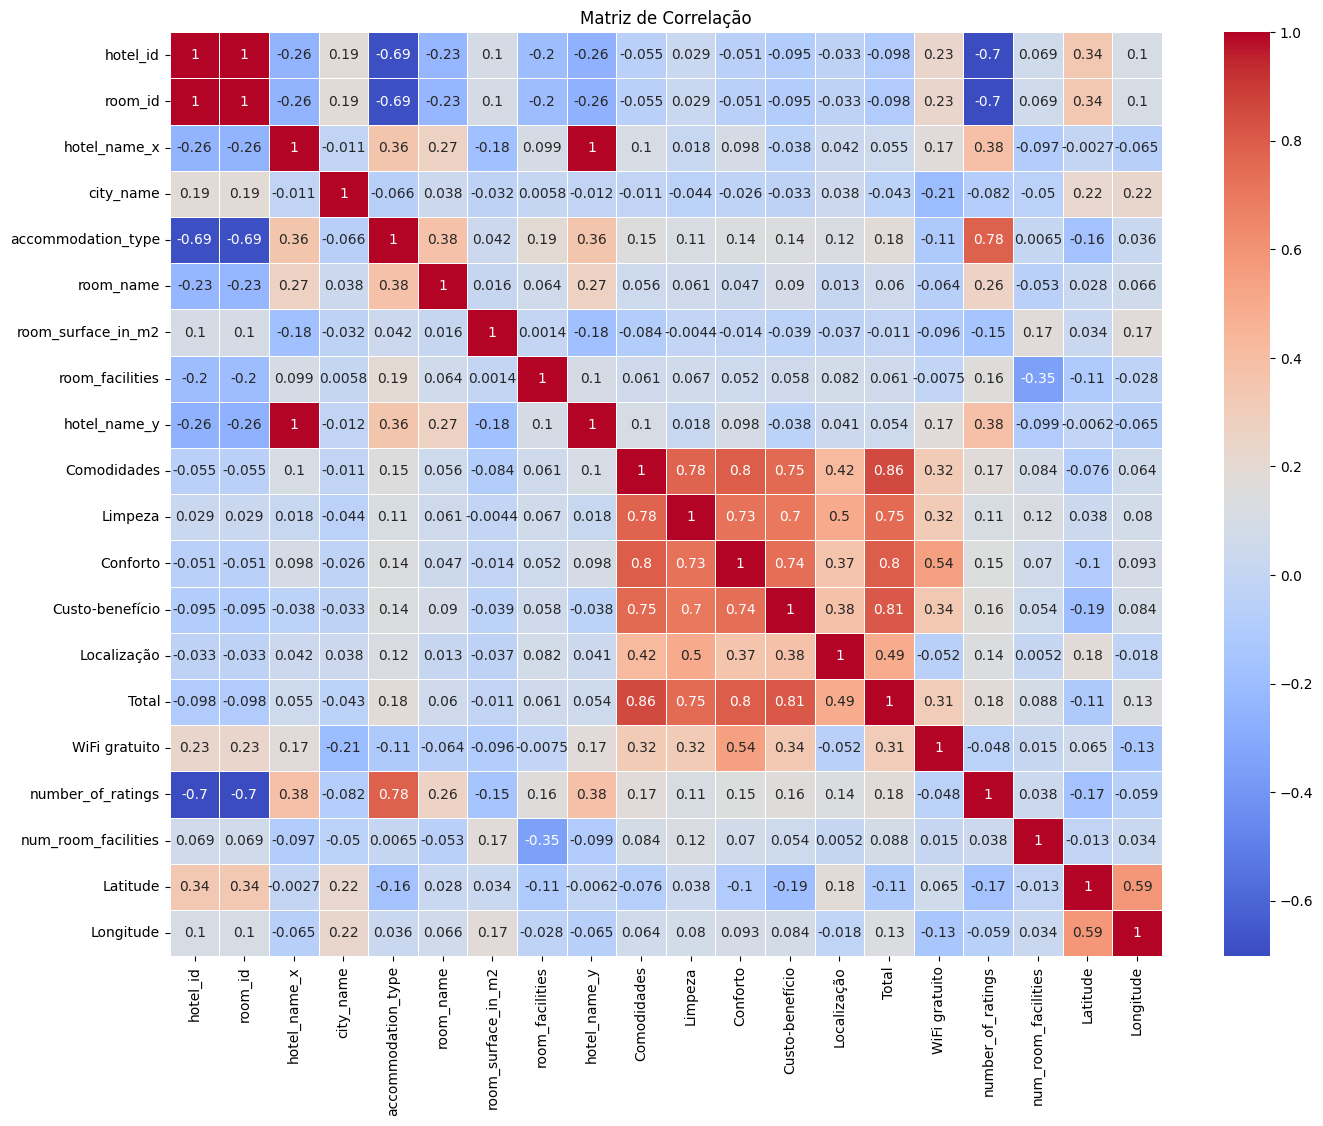

In [42]:
correlation_matrix = imoveis_corr.corr()   # Calcula a matriz de correlação

plt.figure(figsize=(16, 12))               # Plotando o gráfico de correlação 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

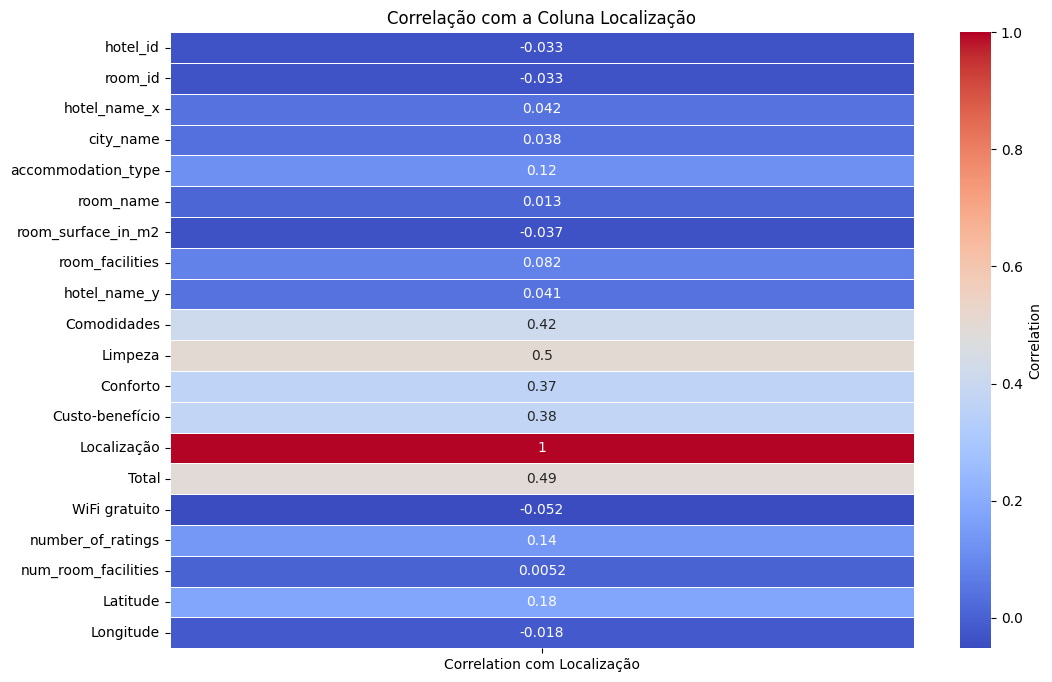

In [43]:
# Calcula as correlações em relação à coluna 'Localização'
correlation_with_location = imoveis_corr.corrwith(imoveis_corr['Localização'])

plt.figure(figsize=(12, 8))
correlation_df = pd.DataFrame({'Correlation com Localização': correlation_with_location}) # Converte para umm DataFrame
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlação com a Coluna Localização')
plt.show()


## Existem relações entre a nota do anúncio e os recursos disponíveis no imóvel?

In [44]:
todas_facilidades_set = set()                                                                                  #Conjunto para armazenar todas as facilities
 
for facilidades_lista in imoveis['room_facilities']:
    if isinstance(facilidades_lista, str):
        facilidades_lista = facilidades_lista.replace("[", "").replace("]", "").replace("'", "").split(", ")   # Remove caracteres indesejados
        todas_facilidades_set.update(facilidades_lista)
    else:
        todas_facilidades_set.update(facilidades_lista)

todas_facilities = list(todas_facilidades_set)                                                                #Lista com todas as facilities 


In [45]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)           

todas_facilidades = todas_facilities               #Tirando o primeiro valor da lista de todas as facilities pois é uma valor vazio
todas_facilities = todas_facilidades[1:]

imoveis_corr_facilities = imoveis_corr
imoveis_corr_facilities['room_facilities'] = imoveis['room_facilities']     #Dataframe com as room_facilities
i = 0
novas_colunas = pd.DataFrame()                                 #Dataframe para criar colunas com as facilidades 

for i in todas_facilities:                                     #Função para adicionar o valor 1 em cada linha que a facilities aparece
    novas_colunas[i] = imoveis_corr_facilities['room_facilities'].apply(lambda x: 1 if i in x else 0)

imoveis_corr_facilities = pd.concat([imoveis_corr, novas_colunas], axis=1)         # Concatena o DataFrame temporário ao DataFrame original
imoveis_corr_facilities = imoveis_corr_facilities.drop('room_facilities', axis=1)


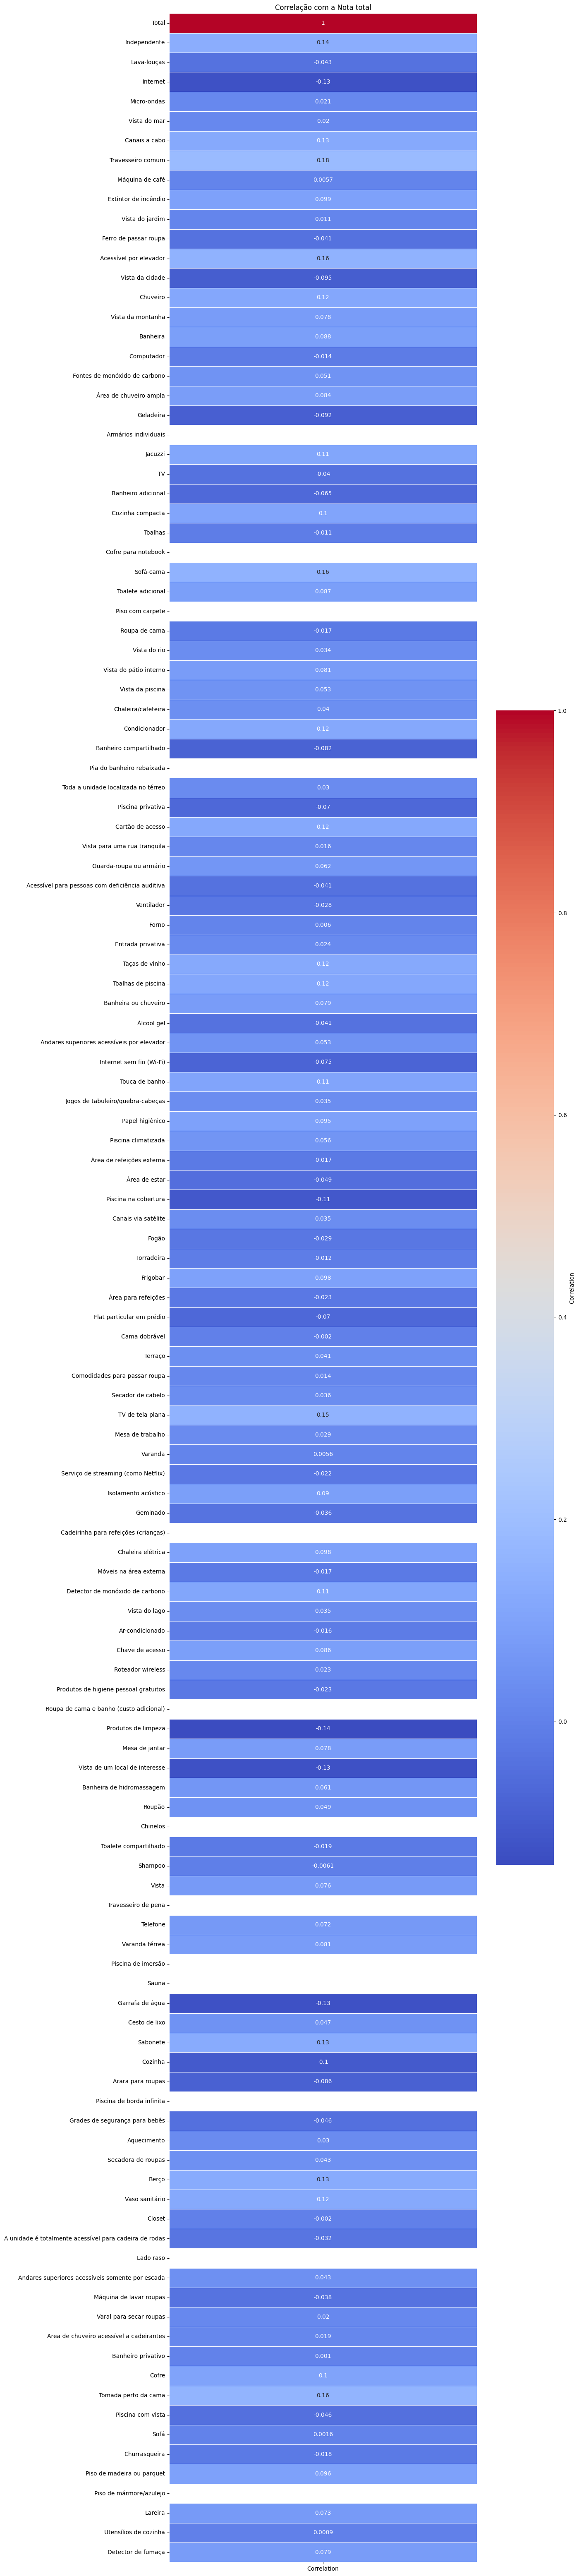

In [46]:
a = ['hotel_id', 'room_id', 'hotel_name_x', 'city_name', 'num_room_facilities',
       'accommodation_type', 'room_name', 'room_surface_in_m2', 'hotel_name_y', 'WiFi gratuito', 'number_of_ratings',
       'Comodidades', 'Limpeza', 'Latitude', 'Longitude', 'Conforto', 'Custo-benefício', 'Localização']

imoveis_corr1 = imoveis_corr_facilities.drop(a, axis=1)
correlation_notas = imoveis_corr1.corrwith(imoveis_corr1['Total'])   # Calcula as correlações em relação à coluna 'Localização'

plt.figure(figsize=(12, 80))
# Converte a série em um DataFrame
correlation_df = pd.DataFrame({'Correlation': correlation_notas})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlação com a Nota total')
plt.show()

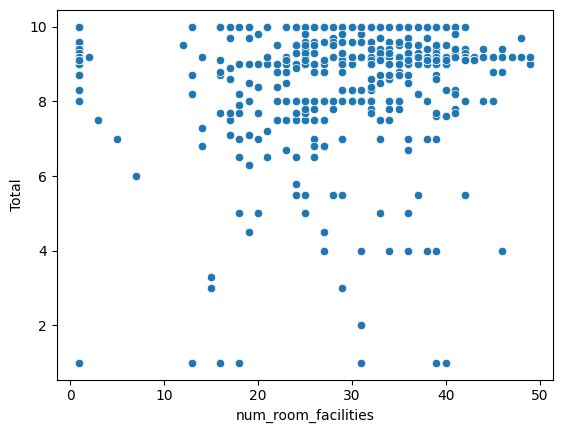

In [47]:
correlation = imoveis_corr[['Total', 'num_room_facilities']].corr()      #Relaçao entre o número de facilities do apartamento com a nota
sns.scatterplot(data=imoveis_corr, y='Total', x='num_room_facilities') 

plt.show()

## Existe alguma relação entre a nota recebida e a localização?

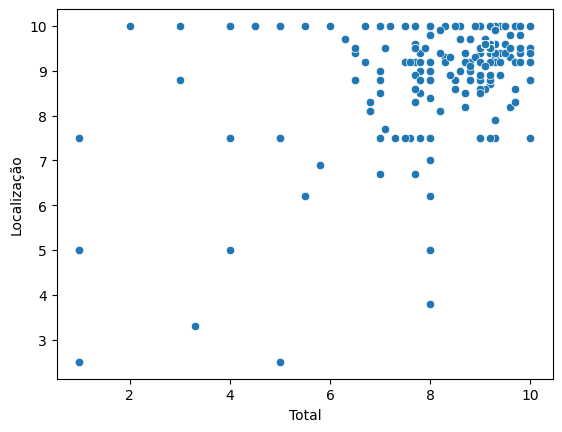

In [48]:
correlation = imoveis_corr[['Total', 'Localização']].corr()      #Relaçao entre o número de facilities do apartamento com a nota
#sns.scatterplot(data=imoveis_corr, y='Total', x='Localização') 
sns.scatterplot(data=imoveis_corr, y='Localização', x='Total')

plt.show()

## O que você pode inferir sobre as notas dos imóveis?

In [49]:
imoveis_corr['room_facilities'] = pd.Categorical(imoveis['room_facilities']).codes    #Fazendo a coluna room_facilities virar numeros para correlaçao

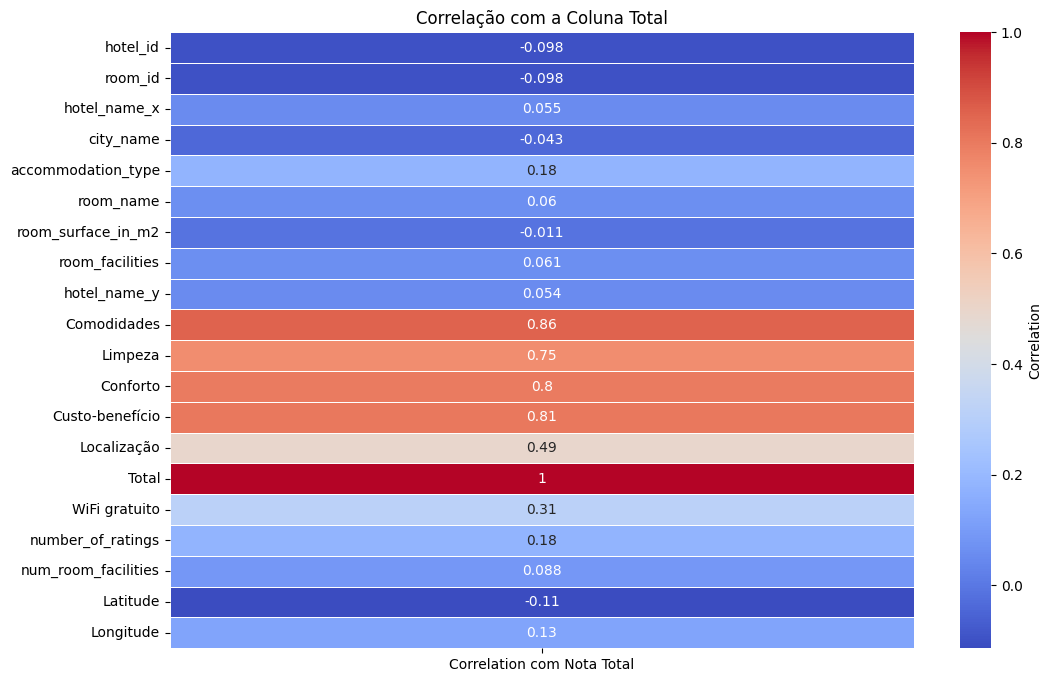

In [50]:
correlation_nota = imoveis_corr.corrwith(imoveis_corr['Total'])    #Fazendo a correlação com a coluna Total

#Pltoando o gráfico
plt.figure(figsize=(12, 8))
correlation_df = pd.DataFrame({'Correlation com Nota Total': correlation_nota})
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlação com a Coluna Total')
plt.show()

In [51]:
media_nota = imoveis_corr['Total'].mean()                     #Média das Notas
desvio_nota = imoveis_corr['Total'].std()                     #Desvio padrão das Notas
coeficiente_nota = (desvio_nota / media_nota) * 100           #Coeficiente de variação das Notas
 
print(f'Média das Notas: {media_nota}')
print(f'Desvio Padrão das Notas: {desvio_nota}')
print(f'Coeficiente de Variação das Notas: {coeficiente_nota:.2f}%')

Média das Notas: 8.710013175230568
Desvio Padrão das Notas: 1.3563609060563118
Coeficiente de Variação das Notas: 15.57%


## Quais são os anúncios que te parecem críticos

In [52]:
# Pegando os imoveis com nota inferios a 6.0

imoveis_total_menor_6 = imoveis[imoveis['Total'] < 6]                                   #Todos os valores em que a nota total é menor que 6
imoveis_critico = imoveis_total_menor_6[['hotel_name_x', 'city_name', 'Total']].copy()  #Pegando apenas as colunas que interessantes  
imoveis_critico = imoveis_critico.drop_duplicates(subset=['hotel_name_x'])              #Tirando imoveis duplicados 
imoveis_critico = imoveis_critico.sort_values(by='Total')

imoveis_critico

,hotel_name_x,city_name,Total
540,Apto moderno a 8 min do centro CTR1302,Camboriú,1.0
966,Cabana Rústica Próxima da Praia MAV009,Florianópolis,1.0
616,Casa tranquila c/ jacuzzi e churrasqueira SJP168,Florianópolis,1.0
888,Linda e ampla casa na Costa da Lagoa CCL004,Florianópolis,1.0
478,"Apartamento para casal em Gramado, RS CGR209",Gramado,1.0
898,Chalé 300m da Praia com Charme Rústico MAV006,Florianópolis,1.0
438,Moderno studio c/ piscina no Partenon CON1506,Porto Alegre,1.0
522,Casa estilo fazenda em Campos do Jordão RIS845,Campos do Jordão,2.0
523,Ótimo apto c/ piscina e de frente à praia LBM306,Florianópolis,3.0
1049,Apto centralizado c/ mobília nova em Jurerê CP...,Florianópolis,3.0
